In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np

Import all the performance metric files

In [2]:
base_dir = '/home/jeremy/tornadoesr/Revisions/Complete_Workflow/'
all_files = os.listdir(base_dir)
metric_files = [file for file in all_files if 'metrics' in file]

In [3]:
for metric_file in metric_files:
    if metric_file == metric_files[0]:
        metrics_df = pd.read_csv(base_dir + metric_file)
    else:
        temp_df = pd.read_csv(base_dir + metric_file)
        metrics_df = pd.concat([metrics_df, temp_df])
metrics_df = metrics_df.reset_index()

# Analysis of the basic models

These are the models which have different variable sets and were explored with descending architecture along with a linear regression

In [4]:
basic_indices = [row_index for row_index in range(len(metrics_df))
                 if metrics_df['notebook_id'][row_index] in [11, 12, 13, 14, 15, 16, 25, 26, 27, 28]]

In [5]:
basic_df = metrics_df.iloc[basic_indices]

In [6]:
basic_min = basic_df['Mean Squared Error'].min()

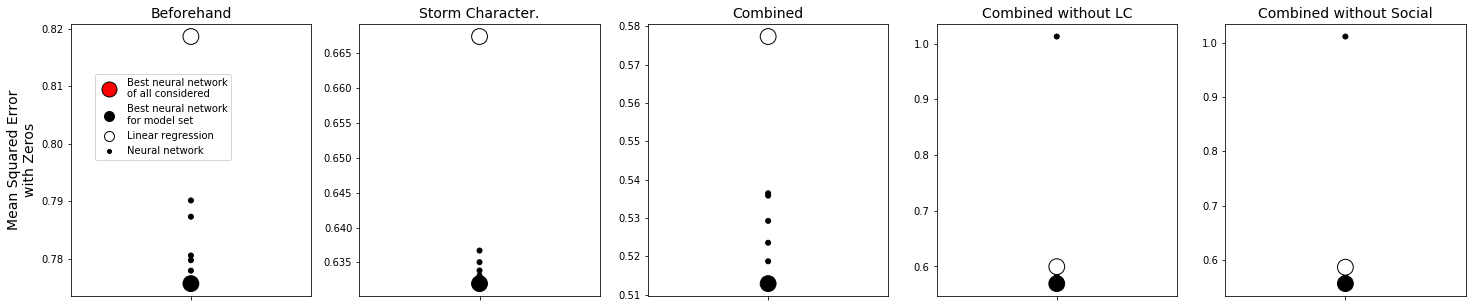

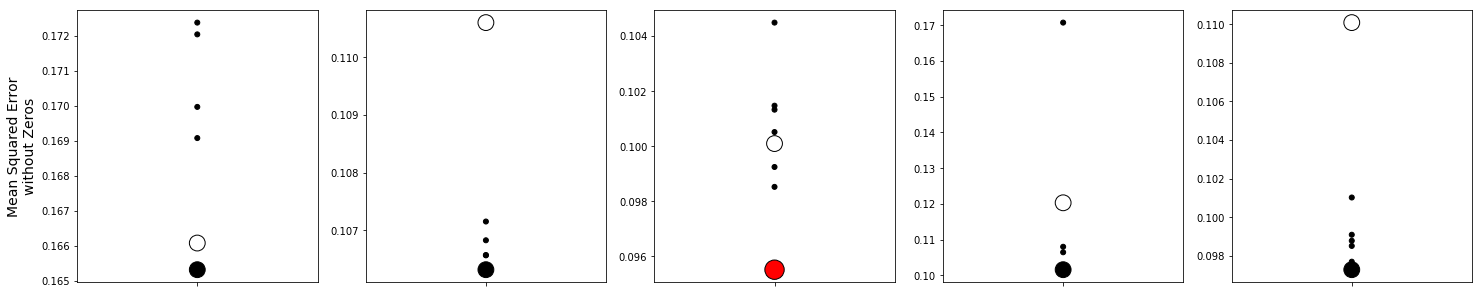

In [30]:
f, axarr = plt.subplots(1,5)
f.set_figheight(5)
f.set_figwidth(25)
xlabels = ['Beforehand', 'Storm Character.', 'Combined', 'Combined without LC', 'Combined without Social']
count = 0
for i in [11, 12, 13, 25, 27]:
    temp_df = basic_df[basic_df['notebook_id'] == i]
    temp_df = temp_df.reset_index()
    linear_reg = temp_df['model_id'].idxmax()
    best = temp_df['Mean Squared Error'].idxmin()
    sizes = np.repeat(100, temp_df.shape[0])
    colors = np.repeat('black', temp_df.shape[0])
    colors[linear_reg] = 'white'
    sizes[linear_reg] = 1000
    sizes[best] = 1000
    try:
        abs_best = temp_df['Mean Squared Error'].tolist().index(basic_min)
        colors[abs_best] = 'red'
        sizes[best] = 1500
    except ValueError as e:
        do = 'nothing'
    axarr[count].scatter(temp_df['notebook_id'],
                         temp_df['Mean Squared Error'],
                         facecolor = colors, marker = '.',
                         s = sizes, edgecolor = 'black')
    axarr[count].set_xticks([i])
    axarr[count].set_xticklabels([''])
    five_perc_range = (temp_df['Mean Squared Error'].max() - temp_df['Mean Squared Error'].min()) * 0.05
    axarr[count].set_ylim(temp_df['Mean Squared Error'].min() - five_perc_range,
                          temp_df['Mean Squared Error'].max() + five_perc_range)
    if i == 11:
        axarr[count].set_ylabel('Mean Squared Error\nwith Zeros', fontsize = 14)
        legend_elements = [Line2D([0], [0], marker='o', color='black', label='Best neural network\nof all considered',
                                  markerfacecolor='red', markersize=15, linewidth = 0),
                           Line2D([0], [0], marker='o', color='black', label='Best neural network\nfor model set',
                                  markerfacecolor='black', markersize=10, linewidth = 0),
                           Line2D([0], [0], marker='o', color='black', label='Linear regression',
                                  markerfacecolor='white', markersize=10, linewidth = 0),
                           Line2D([0], [0], marker='o', color='black', label='Neural network',
                                  markerfacecolor='black', markersize=4, linewidth = 0)]
        axarr[count].legend(handles=legend_elements, loc=[0.1, 0.5])
    axarr[count].set_title(xlabels[count], fontsize = 14)
    count += 1
    
f, axarr = plt.subplots(1,5)
f.set_figheight(5)
f.set_figwidth(25)
count = 0
for i in [14, 15, 16, 26, 28]:
    temp_df = basic_df[basic_df['notebook_id'] == i]
    temp_df = temp_df.reset_index()
    linear_reg = temp_df['model_id'].idxmax()
    best = temp_df['Mean Squared Error'].idxmin()
    sizes = np.repeat(100, temp_df.shape[0])
    colors = np.repeat('black', temp_df.shape[0])
    colors[linear_reg] = 'white'
    sizes[linear_reg] = 1000
    sizes[best] = 1000
    try:
        abs_best = temp_df['Mean Squared Error'].tolist().index(basic_min)
        colors[abs_best] = 'red'
        sizes[best] = 1500
    except ValueError as e:
        do = 'nothing'
    axarr[count].scatter(temp_df['notebook_id'],
                         temp_df['Mean Squared Error'],
                         facecolor = colors, marker = '.',
                         s = sizes, edgecolor = 'black')
    axarr[count].set_xticks([i])
    axarr[count].set_xticklabels([''])
    five_perc_range = (temp_df['Mean Squared Error'].max() - temp_df['Mean Squared Error'].min()) * 0.05
    axarr[count].set_ylim(temp_df['Mean Squared Error'].min() - five_perc_range,
                          temp_df['Mean Squared Error'].max() + five_perc_range)
    if i == 14:
        axarr[count].set_ylabel('Mean Squared Error\nwithout Zeros', fontsize = 14)
    count += 1

# Analysis of the combined models

In [23]:
combined_indices = [row_index for row_index in range(len(metrics_df))
                    if metrics_df['notebook_id'][row_index] in [16, 17, 18, 19, 20,
                                                                21, 22, 23, 24]]

In [9]:
combined_df = metrics_df.iloc[combined_indices]

In [10]:
combined_min = combined_df['Mean Squared Error'].min()

19 7


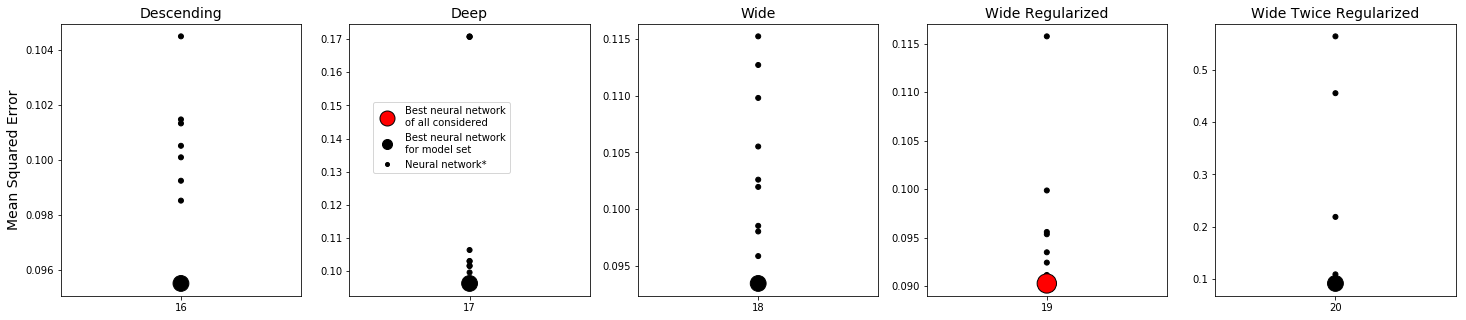

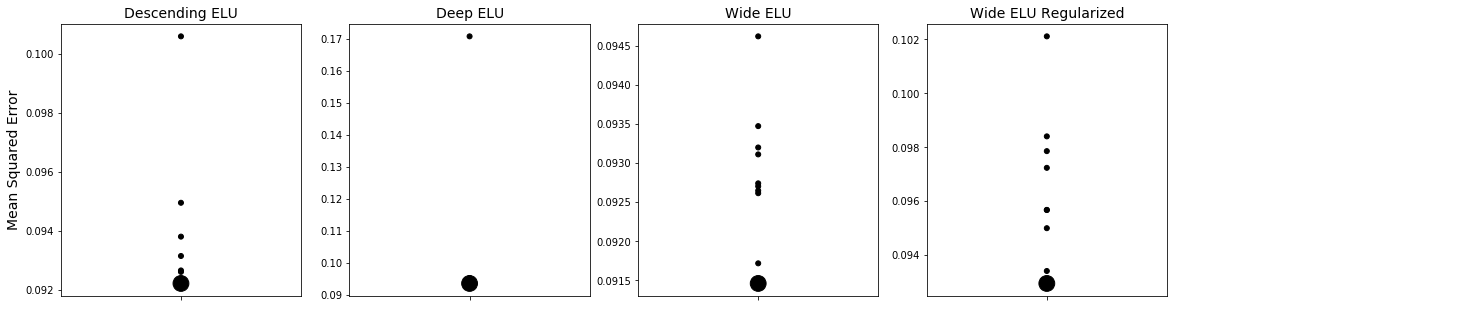

In [29]:
f, axarr = plt.subplots(1,5)
f.set_figheight(5)
f.set_figwidth(25)
xlabels = ['Descending', 'Deep', 'Wide', 'Wide Regularized', 'Wide Twice Regularized']
count = 0
for i in [16, 17, 18, 19, 20]:
    temp_df = combined_df[combined_df['notebook_id'] == i]
    temp_df = temp_df.reset_index()
    best = temp_df['Mean Squared Error'].idxmin()
    sizes = np.repeat(100, temp_df.shape[0])
    colors = np.repeat('black', temp_df.shape[0])
    sizes[best] = 1000
    try:
        abs_best = temp_df['Mean Squared Error'].tolist().index(combined_min)
        colors[abs_best] = 'red'
        sizes[best] = 1500
        print(i, abs_best)
    except ValueError as e:
        do = 'nothing'
    axarr[count].scatter(temp_df['notebook_id'],
                         temp_df['Mean Squared Error'],
                         facecolor = colors, marker = '.',
                         s = sizes, edgecolor = 'black')
    axarr[count].set_xticks([i])
    axarr[count].set_xticklabels([''])
    five_perc_range = (temp_df['Mean Squared Error'].max() - temp_df['Mean Squared Error'].min()) * 0.05
    axarr[count].set_ylim(temp_df['Mean Squared Error'].min() - five_perc_range,
                          temp_df['Mean Squared Error'].max() + five_perc_range)
    if i == 16:
        axarr[count].set_ylabel('Mean Squared Error', fontsize = 14)
    if i == 17:
        legend_elements = [Line2D([0], [0], marker='o', color='black', label='Best neural network\nof all considered',
                                  markerfacecolor='red', markersize=15, linewidth = 0),
                           Line2D([0], [0], marker='o', color='black', label='Best neural network\nfor model set',
                                  markerfacecolor='black', markersize=10, linewidth = 0),
                           Line2D([0], [0], marker='o', color='black', label='Neural network*',
                                  markerfacecolor='black', markersize=4, linewidth = 0)]
        axarr[count].legend(handles=legend_elements, loc=[0.1, 0.45])
    axarr[count].set_title(xlabels[count], fontsize = 14)
    count += 1
    
f, axarr = plt.subplots(1,5)
f.set_figheight(5)
f.set_figwidth(25)
xlabels = ['Descending ELU', 'Deep ELU', 'Wide ELU', 'Wide ELU Regularized']
count = 0
for i in [23, 21, 22, 24]:
    temp_df = combined_df[combined_df['notebook_id'] == i]
    temp_df = temp_df.reset_index()
    best = temp_df['Mean Squared Error'].idxmin()
    sizes = np.repeat(100, temp_df.shape[0])
    colors = np.repeat('black', temp_df.shape[0])
    sizes[best] = 1000
    try:
        abs_best = temp_df['Mean Squared Error'].tolist().index(combined_min)
        colors[abs_best] = 'red'
        sizes[best] = 1500
        print(i, abs_best)
    except ValueError as e:
        do = 'nothing'
    axarr[count].scatter(temp_df['notebook_id'],
                         temp_df['Mean Squared Error'],
                         facecolor = colors, marker = '.',
                         s = sizes, edgecolor = 'black')
    axarr[count].set_xticks([i])
    axarr[count].set_xticklabels([''])
    axarr[count].set_title(xlabels[count], fontsize = 14)
    five_perc_range = (temp_df['Mean Squared Error'].max() - temp_df['Mean Squared Error'].min()) * 0.05
    axarr[count].set_ylim(temp_df['Mean Squared Error'].min() - five_perc_range,
                          temp_df['Mean Squared Error'].max() + five_perc_range)
    if i == 23:
        axarr[count].set_ylabel('Mean Squared Error', fontsize = 14)
    count += 1
axarr[4].axis('off');